In [133]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import constants as const
import matplotlib as mpl
from utils import *

In [134]:
# lmbda_1 = 474 * 1e-9
lmbda_1 = 780 * 1e-9
# lmbda_1 = 948 * 1e-9

r_1 = 1e3
r_2 = 230 * 1e-3 

a = 4.5 * 1e-3 / 2

### PARAMETERS ###
# Total diffraction losses
losses = 1 - 1.0054e-06

### MIRRORS ###
R_1 = 0.9999
R_2 = 0.9999

l = 0.16853

In [135]:
g_1 = g(l, r_1)
g_2 = g(l, r_2)

Frensel_n = N(a, l, lmbda_1)

waist = beam_waist(g_1, g_2, l, lmbda_1)

gamma = - np.log(R_1*R_2*(losses))

finesse = 2 * np.pi / gamma
finesse

31257.233378850753

In [136]:
tau = tau_c(l, gamma)
print('Photon lifetime:', np.round(tau * 1e9, 3), 'ns')

Photon lifetime: 5593.159 ns


In [137]:
lw = linewidth(l, gamma)

nu_1 = const.c / lmbda_1
count = int(2 * l * nu_1 / const.c)

In [138]:
n = np.linspace(count-2, count+2, 5)

nu = eigfreq(g_1, g_2, l, n, m=0)
for j in range(1, 3):
    nu_j = eigfreq(g_1, g_2, l, n, m=j)
    nu = np.concatenate((nu, nu_j))
print(j)
# nu = eigfreq(g_1, g_2, l, n)
nu = np.sort(nu)
wavelength = const.c / nu * 1e9

freq = np.linspace(nu[0],  nu[-1], int(1e6))
wvl = const.c / freq * 1e9
freq = freq

spec, sp = lorenz_PDF(freq, nu, lw/2)


2


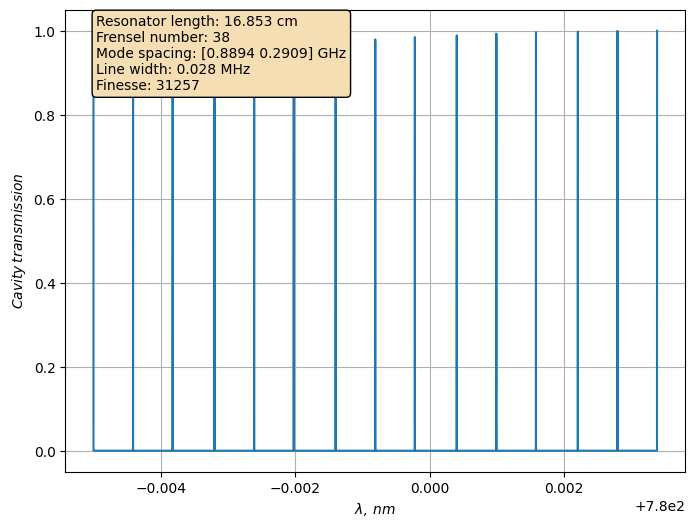

In [139]:
mpl.rcParams.update({'font.size': 10})
s0 = 'Resonator length: ' +  str(np.round(l*100, 3)) + ' cm\n'
s1 = 'Frensel number: ' + str(int(Frensel_n)) + '\n'
s2 = 'Mode spacing: ' + str(np.round(np.asarray(mode_spacing(g_1, g_2, l))/1e9, 4)) + ' GHz\n'
s3 = 'Line width: ' + str(np.round(lw/1e6, 3)) + ' MHz\nFinesse: ' + str(int(finesse))
s = s0 + s1 + s2 + s3
    
fig, ax = plt.subplots(figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
props = dict(boxstyle='round', facecolor='wheat', alpha=1)
ax.plot(wvl, sp)
ax.grid()
ax.set_xlabel('$\lambda, \: nm$')
ax.set_ylabel('$Cavity \: transmission$')
# place a text box in upper left in axes coords
ax.text(0.05, 0.99, s, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)
plt.show()

In [140]:
print('Mode spacing:', np.round((nu[1] - nu[0])/1e9, 4), 'GHz')

Mode spacing: 0.2909 GHz


In [141]:
ll = np.linspace(1e-3, 1-1e-3, 10000) * r_2
gg_2 = g(ll,r_2)
gg_1 = g(ll, r_1)
D = misaligment(g_1, gg_2, ll, lmbda_1)
D0 = np.sqrt(2*np.pi*l/lmbda_1)

Text(0, 0.5, 'D')

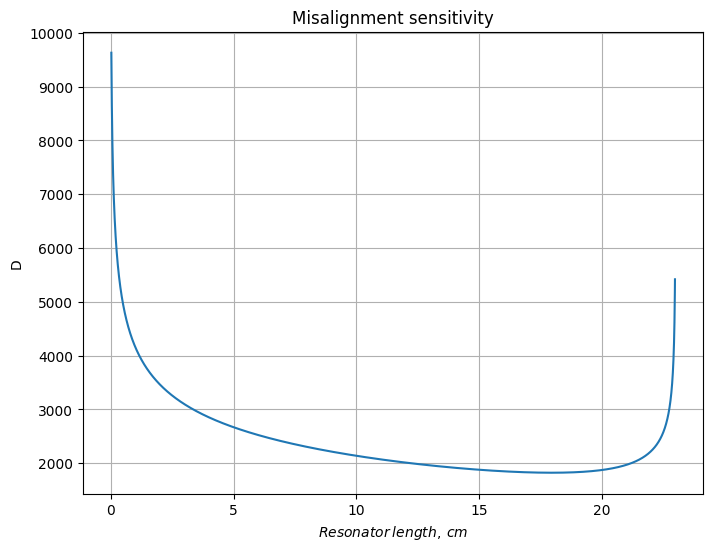

In [142]:
plt.figure(figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
plt.plot(ll*100, D)
plt.grid()
plt.title('Misalignment sensitivity')
plt.xlabel('$Resonator \: length, \: cm$')
plt.ylabel('D')

In [143]:
w_1 = mirror_1(gg_1, gg_2, ll, lmbda_1)
w_2 = mirror_2(gg_1, gg_2, ll, lmbda_1)
waist = beam_waist(gg_1, gg_2, ll, lmbda_1)


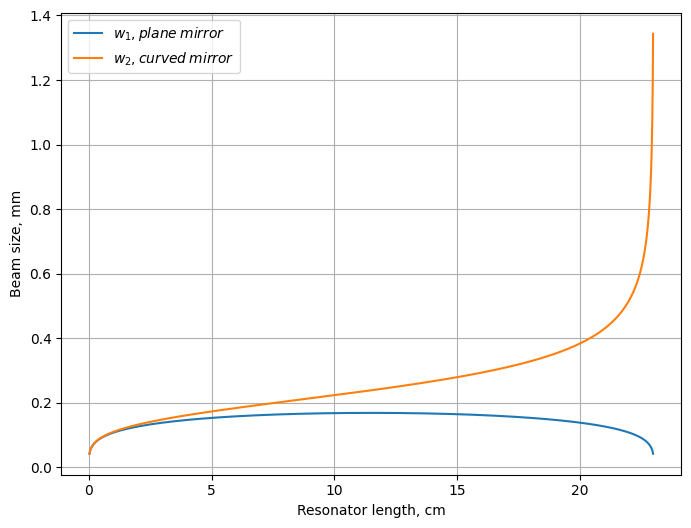

In [144]:
plt.figure(figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
plt.plot(ll*100, w_1*1e3, label='$w_1, plane \:mirror$')
plt.plot(ll*100, w_2*1e3, label='$w_2, curved \:mirror$')
plt.grid()
plt.xlabel('Resonator length, cm')
plt.ylabel('Beam size, mm')
plt.legend()


Длина резонатора без пьезы : $\approx 16.6 \: cm$
<br>
Диаметр пучка на плоском зеркале: $318 \: \mu m$
<br>
Пучок в эксперименте: $330 \: \mu m$

In [145]:
(12.2 * 1e-6) / (0.93 * 1e-3) * 100

1.311827956989247

In [146]:
const.c / (632.222 * 1e12) * 1e9

474.1885888184847

In [147]:
2 * np.pi / (gamma)

31257.233378850753

In [148]:
import pandas as pd

In [149]:
data = pd.read_excel('mirror_meas.xlsx')
data

,"Laser Current, mA","Power before mirror, mW","Power after mirror, uW","Noise, uW"
0,248.8,16.50,17.1,0.003
1,238.0,15.60,16.1,NaN
2,228.0,14.40,14.7,NaN
3,218.0,13.70,13.9,NaN
4,208.0,12.60,13.0,NaN
5,198.0,11.89,12.2,NaN
6,188.0,11.34,11.6,NaN


In [150]:
pow = data['Power before mirror, mW'] * 1000
pow_a = data['Power after mirror, uW']- - 0.003
current = data['Laser Current, mA']

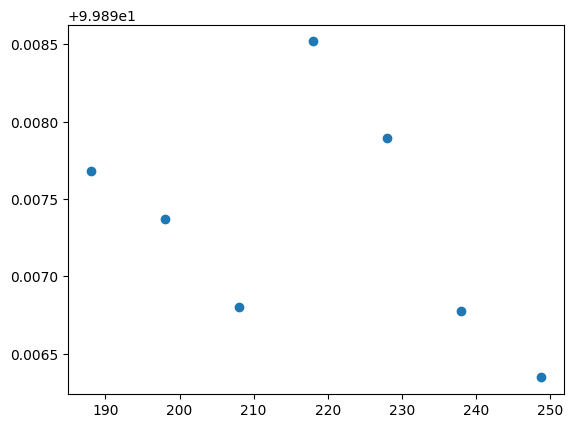

In [151]:
plt.scatter(current, (1 - pow_a/pow) * 100)

In [152]:
lmbda_1 * 300*1e-3 / np.pi / (159*1e-6) * 1e3 * 2

0.9369121178239879

In [153]:
np.pi * (318*1e-6/2)**2 / lmbda_1

0.10182385112231224

In [154]:
w_00 = mirror_1(g_1, g_2, l, lmbda_1)
z_rr = np.pi * w_00**2 / lmbda_1
mirror_2(g_1, g_2, l, lmbda_1) * 2 * 1e6

614.9570819981359